In [4]:
import numpy as np
from scipy.spatial.distance import *

In [94]:
points = array([[0,0],[1,0],[1,1],[9,0],[0,1],[10,0]])
distMarix = pdist(points, 'euclidean')
distMarix = squareform(distMarix);

In [84]:
k = 3
knn_index = np.argsort(distMarix)[:,0:k+1][:,-1:].ravel()
dist_k_o = distMarix[np.arange(len(distMarix)),knn_index]
k_dist_Neig = []
for i in range(len(points)):
    kdn = np.nonzero(distMarix[i,:] <= dist_k_o[i])[0]
    small_list = kdn.tolist()
    small_list.remove(i)
    k_dist_Neig.append(small_list)
k_dist_Neig    

[[1, 2, 4], [0, 2, 4], [0, 1, 4], [1, 2, 5], [0, 1, 2], [1, 2, 3]]

In [85]:
def reachDist(a,b):
    distka = dist_k_o[a]
    return max(distka,distMarix[a,b])

In [86]:
lrdk_o = []
for k in range(len(points)):
    Nko = k_dist_Neig[k]
    sum_reach_dist = 0
    for i in Nko:
        reach_dist_k_i = reachDist(i,k)
        sum_reach_dist = sum_reach_dist +  reach_dist_k_i
    lrdk_o.append(len(Nko)/sum_reach_dist)
lrdk_o

[0.70710678118654746,
 0.70710678118654746,
 0.70710678118654746,
 0.11943795895036236,
 0.70710678118654746,
 0.11486488321494093]

In [90]:
def lof_k_o(a):
    b = k_dist_Neig[a]
    sum1 = sum([lrdk_o[i] for i in b])
    sum2 = 0
    for i in b:
        reach_dist_k_i = reachDist(i,a)
        sum2  = sum2 + reach_dist_k_i
    return (sum1 + sum2)/len(b)

In [91]:
lof_val = []
for i in range(len(points)):
    lof_val.append(lof_k_o(i))
lof_val

[2.1213203435596424,
 2.1213203435596424,
 2.1213203435596424,
 8.8822404440079996,
 2.1213203435596424,
 9.217098135919807]

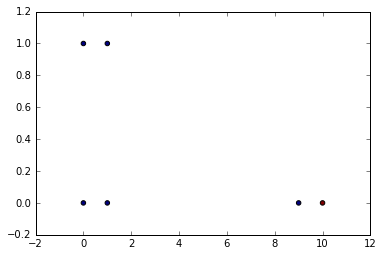

In [93]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
color = np.zeros(len(points))
max_value = max(lof_val)
max_index = lof_val.index(max_value)
color[max_index] = 1
plt.scatter(points[:,0],points[:,1],c = color)
plt.show()